#### Эпизод 1

##### Решение

Задана матрица 9х9. Найдите её собственные значения в символьном виде.

In [57]:
from sympy import var, Matrix, BlockMatrix, zeros, eye

def episode_1():
    l, r, m = var('lambda rho mu')
    O = zeros(3, 3)
    E = eye(3)
    M1 = Matrix([[-(l+2*m), 0, 0], [0, -m, 0], [0, 0, -m]])
    M2 = Matrix([[-l, 0, 0], [0, 0, 0], [-l, 0, 0]])
    M = Matrix(BlockMatrix([[O, -E/r, O], 
                            [M1, O, O],
                            [M2, O, O]]))
    return list((M.eigenvals().keys()))

##### Отображение

In [58]:
a = episode_1()
print(f"Корней: {len(a)}")
a[0]

Корней: 5


-sqrt((lambda + 2*mu)/rho)

In [52]:
a[1]

sqrt((lambda + 2*mu)/rho)

In [53]:
a[2]

-sqrt(mu/rho)

In [54]:
a[3]

sqrt(mu/rho)

In [55]:
a[4]

0

---
#### Эпизод 2

##### Решение

В файле задана система линейных уравнений вида Ax = b. Формат файла: в первой строке N - размерность вектора неизвестных; далее N строк с N значений через пробел в каждой - матрица A; далее ещё одна строка с N значений через пробел - вектор b.

Решите эту систему, результат нарисуйте barchart-ом, где i-ый столбик - значение соответственного x[i].

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

def episode_2(s: str, fs: tuple):
    # >>>>>>>>>>>>>> Загрузка данных <<<<<<<<<<<<<<<<<
    relative_path = 'laba04/'
    with open(relative_path + s + '.txt', 'r') as f:
        n = 10
        for i, l in enumerate(f):
            if i == 0:
                n = int(l.strip())
                A = np.zeros((n, n))
                b = np.zeros(n)
            elif i <= n:
                A[i-1] = list(map(float, l.strip().split()))
            else:
                b = list(map(float, l.strip().split()))
    
    # >>>>>>>>>>>>>> Решение системы <<<<<<<<<<<<<<<<<
    x = scipy.linalg.solve(A, b)

    # >>>>>>>>>>>>>> Отрисовка <<<<<<<<<<<<<<<<<
    fig, ax = plt.subplots(figsize=fs)
    ax.bar(range(n), x)
    ax.set_title(s)
    ax.grid()
    plt.show()

##### Отображение

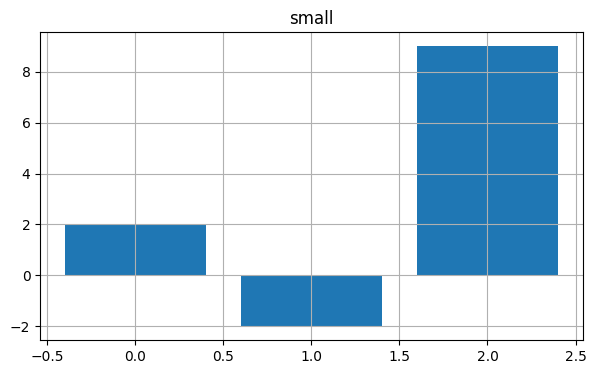

In [46]:
episode_2(s='small', fs=(7, 4))

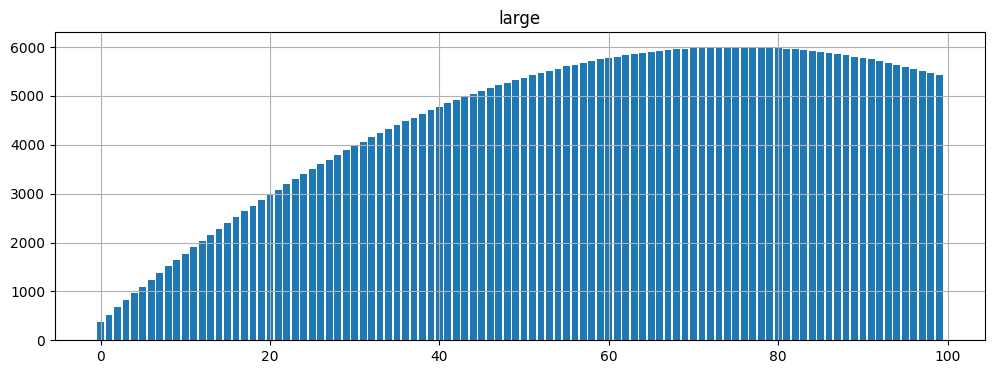

In [48]:
episode_2(s='large', fs=(12, 4))

---
#### Эпизод 3

##### Решение

Задан дифур. Решите его два раза - один раз символьно SymPy-ем, второй раз численно SciPy-ем. $$\frac{dy(x)}{dx}=-2y(x), \hskip20px y(0)=\sqrt{2}$$

Выведите решение, найденное SymPy-ем. Постройте графики: (1) обоих решений на отрезке [0; 10], (2) разности решений SymPy-ем и SciPy-ем на этом же отрезке.

In [3]:
import sympy as sp
import scipy
import numpy as np
import matplotlib.pyplot as plt

def episode_3(n: int = 100):
    x = np.linspace(0, 10, n).tolist()
    
    # >>>>>>>>>>>>>> Решение sympy <<<<<<<<<<<<<<<<<
    t = sp.var('t')
    y = sp.Function('y')
    a = sp.dsolve(sp.Eq(y(t).diff(t), -2*y(t)), y(t), ics={y(0): sp.sqrt(2)})
    f_sympy = sp.lambdify(t, a.rhs)
    y_sympy = [f_sympy(i) for i in x]

    # >>>>>>>>>>>>>> Решение scipy <<<<<<<<<<<<<<<<<
    anw = scipy.integrate.ode(lambda x, y: -2*y)
    anw.set_initial_value(np.sqrt(2), 0)
    y_scipy = [np.sqrt(2)]
    for i in range(n - 1):
        y_scipy.append(anw.integrate(x[i+1])[0])

    # >>>>>>>>>>>>>> Отображение <<<<<<<<<<<<<<<<<
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    axs[0].plot(x, y_sympy, label="sympy")
    axs[0].plot(x, y_scipy, label="scipy")
    # axs[1].plot(x, (y_scipy - np.array(y_sympy)) / y_scipy, label="scipy - sympy")
    axs[1].plot(x, y_scipy - np.array(y_sympy), label="scipy - sympy")

    for i in range(2):
        axs[i].legend()
        axs[i].grid()
    plt.show()

    print(f"\033[1mРешение уравнения\033[0m:")
    return a

##### Отображение

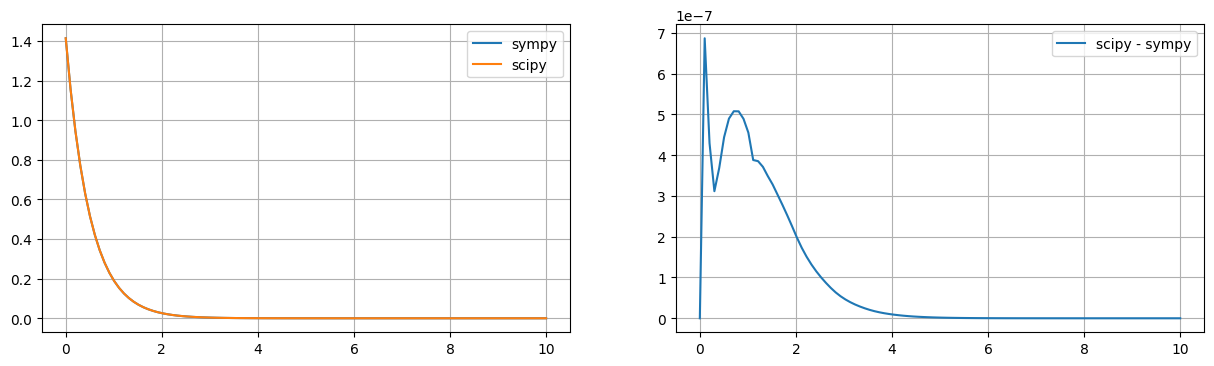

Решение уравнения:


Eq(y(t), sqrt(2)*exp(-2*t))

In [4]:
episode_3(n = 100)